In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
plt.ion()

import sklearn.decomposition
import sklearn.svm
import sklearn.neighbors


In [2]:
## data set 1 ##
K=10
import sklearn.datasets
X,y = sklearn.datasets.load_digits(n_class=K, return_X_y=True)
DimRepre = 8
ratio_train = 0.6 # on peut reduire ce nombre lorsqu'on utilise le gros data set, mnist70.npz
ratio_valid = 0.3 # on peut reduire ce nombre lorsqu'on utilise le gros data set, mnist70.npz


In [3]:
## data set 2 ##
# LoadObject = np.load("mnist70.npz")
# DimRepre = 28
# X = LoadObject['X']
# y = LoadObject['y']
# del LoadObject
# ratio_train = 0.1
# ratio_valid = 0.1

In [4]:
# ## data set 3 ##
# LoadObject = np.load("fashion-mnist-reshaped.npz")
# DimRepre = 28
# X = LoadObject['train_images']
# y = LoadObject['train_labels']
# Xtest = LoadObject['test_images']
# ytest = LoadObject['test_labels']
# X     = np.array(X    , dtype=float) ## on change le type, car c'est unsigned-int (uint) au depart
# Xtest = np.array(Xtest, dtype=float)
# del LoadObject
# ratio_train = 0.1
# ratio_valid = 0.1

In [5]:
architecture = 'KNN'
architecture = 'SVM'

premiere_partie_qq_essais_a_la_main = False
premiere_partie_qq_essais_a_la_main = True
seconde_partie_essais_systematiques_sur_nComp_PCA = True
seconde_partie_essais_systematiques_sur_nComp_PCA = False
troisieme_partie_essais_systematiques_sur_nComp_ET_sur_un_hyperParam = True
troisieme_partie_essais_systematiques_sur_nComp_ET_sur_un_hyperParam = False


## Partie 1

Text(0.5, 1.0, 'ceci est censé ressembler à un 4 avant la binarisation')

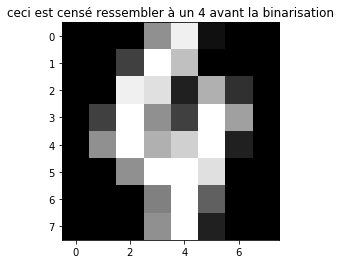

In [6]:
plt.figure()
n=41 # image numero 42
plt.imshow(X[n].reshape(DimRepre, DimRepre) , cm.gray)
plt.title("ceci est censé ressembler à un "+str(y[n])+ " avant la binarisation")


In [7]:

# on met X (les intensités de niveaux de gris) entre 0 et 1
X /= ?? # 

In [11]:
def load_subSets(X, ratio_train, ratio_valid):
    ratio_test = 1 - ratio_train - ratio_valid #
    assert(ratio_test>0)
    Ntot   = X.shape[0]
    Ntrain = int(ratio_train*Ntot)
    Nvalid = int(ratio_valid*Ntot)
    Ntest  = Ntot - Ntrain - Nvalid
    X_train = X[0: Ntrain].copy()
    y_train = y[0: Ntrain].copy()
    X_valid = X[Ntrain:Ntrain+Nvalid].copy() # X[-Ntest:] est equivalent
    y_valid = y[Ntrain:Ntrain+Nvalid].copy() # X[-Ntest:] est equivalent
    X_test  = X[-Ntest:].copy()
    y_test  = y[-Ntest:].copy()
    return X_train, y_train, X_valid, y_valid, X_test, y_test

X_train, y_train, X_valid, y_valid, X_test, y_test = load_subSets(X, ratio_train, ratio_valid)


In [12]:
ratio_train = ??
ratio ??
X_train, y_train, X_valid, y_valid, X_test, y_test = load_subSets(??)

In [14]:
### 1er essai de PCA avec ratio de variance expliquee fixe a 0.95

# if premiere_partie_qq_essais_a_la_main:
varianceExplained=0.95
preProc = sklearn.decomposition.PCA() ## TODO: fixer les hyper-parametres de cette transformation
# preProc.fit()
## TODO: combien y a t il de composantes qui ont ete retenues ?



In [ ]:
## trace de la variance expliquee au total pour tous les choix de n_components
## realisables (pour des variances expliquees entre 0 et 0.95)
CumulativeExplainedVariance = np.cumsum(preProc.explained_variance_ratio_)
plt.plot(CumulativeExplainedVariance)
plt.ylim([0,1])

In [ ]:
## TODO: pour une image apres "compression" par PCA, calculer l'image décompressee correspondante.
## TODO: calculer la version decompressée de tout le train-set.
## TODO: calculer ensuite l'erreur de reconstruction (erreur quadratique moyenne sur les pixels) pour cette image.
## eventuellement, faites ceci dans une fonction pour pouvoir rpaidement comparer visuellement n'importe quel exemple d'entrainement avant et apres compression/decompression.

## TODO : calculer l'erreur quadratique moyenne sur tout le train-set (indice: ca se fait en 1 seule ligne)

## Partie 2

In [ ]:
linear_training_score = []
linear_valid_score = []
X_train, y_train, X_valid, y_valid, X_test, y_test = load_subSets(X)
## TODO: pour differentes valeurs de n_components, realiser une PCA
## puis un apprentissssage supervise des classes
nComp_range =
for nC in nComp_range:
    preProc = sklearn.decomposition.PCA() ## TODO
    # preProc.fit( TODO )
    ## TODO: transformer les donnees selon cette transformation apprise

    ## TODO: faire l'apprentissage supervisé des classes ,
    ## a l'aide d'un SVM polynomial de degre 2 (et avec C=1, coef0 = 1)
    # clf = ## TODO
    clf.fit(X_train_Transformed, y_train)
    ## TODO: calculer les scores a l'aide de clf.score()
    # trainscore = # TODO
    # validscore = # TODO
    print("nombre Composants", nC , "   training score:",trainscore, ". valid score:", validscore)
    linear_training_score.append(trainscore)
    linear_valid_score.   append(validscore)


In [ ]:
## plot des scores en fonction de l'hyper-param. nc
## c'est cadeau (rien à faire ici)
plt.figure()
plt.plot(nComp_range, linear_training_score, label= "train score")
plt.plot(nComp_range, linear_valid_score   , label= "valid score")
plt.xlabel("nombre comp")
plt.ylabel("scores")
plt.legend()
plt.ylim([0.5,1])

In [ ]:
## affichage du meilleur point (ensemble de validation)
## ici on fait un choix primaire, sans tenir compte d el'overfitting, etc:
## il peut etre affiné a la main
bestIndex = np.argmax(linear_valid_score)
bestNC = nComp_range[bestIndex]
plt.plot(bestNC, linear_valid_score[bestIndex], marker='X', color='green')

## Partie 3

In [ ]:
nComp_range = np.arange(1,64,4)
hyperParam_range = [10**k  for k in range(-4,4,1)]
kernel = 'poly'
degree = 2

array_training_score = np.zeros( (len(nComp_range), len(hyperParam_range)) )
array_validati_score = np.zeros( (len(nComp_range), len(hyperParam_range)) )

ratio_train = 0.4
ratio_valid = 0.4
X_train, y_train, X_valid, y_valid, X_test, y_test = load_subSets(X, ratio_train, ratio_valid)

In [ ]:
for i, nC in enumerate(nComp_range):
    X_train_Transformed = 0 # TODO
    ## TODO : completer ici
    for j, mu in enumerate(hyperParam_range):
        ## TODO: completer ici
        array_training_score[i,j] = trainscore
        array_validati_score[i,j] = validscore

In [ ]:
### trace de la figure ###
plt.figure()
levels=np.array([0.5,0.6,0.7,0.8,0.9,0.95,1])
# levels=np.arange(0.8,1.0,0.01) ## pour un trace plus fin
plt.contourf(array_validati_score, levels=levels)
if architecture=='SVM':
    nameofHyperParam = 'C (SVM)'
else:
    nameofHyperParam = 'k (k-NN)'
plt.xlabel("hyper-param "+nameofHyperParam)
xtick = np.arange(len(hyperParam_range))
plt.xticks(xtick, hyperParam_range)
plt.ylabel("num. of Comp (PCA)")
ytick = np.arange(len(nComp_range))
plt.yticks(ytick, nComp_range)
plt.colorbar()
# indice_max = ## TODO chercher par vous meme (ou stackoverflow) comment trouver le argmax d'un tableau a deux entrées
# plt.scatter(indice_max[1],indice_max[0] , marker='X', color='red')
plt.savefig("hyper-param-tuning_arci="+architecture+".png")

